# Calibration curve - heart data

In [6]:
# Core libraries
import numpy as np
import pandas as pd

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
# Load heart disease data
df = pd.read_csv('heart.csv')

# Shuffle the rows
df = df.sample(frac=1).reset_index(drop=True)

columns_keep = ['target', 'exang', 'cp', 'oldpeak', 'thalach', 'ca', 'slope', 'thal', 'sex', 'age', 'trestbps', 'restecg']
df = df[columns_keep]
df.head()

,target,exang,cp,oldpeak,thalach,ca,slope,thal,sex,age,trestbps,restecg
0,1,0,0,0.0,178,0,2,2,1,42,140,1
1,0,1,0,2.0,114,0,1,3,1,40,110,0
2,0,1,2,1.8,131,0,1,3,1,64,125,1
3,1,0,0,1.0,122,0,1,2,0,58,100,0
4,0,1,0,1.6,103,0,0,3,1,56,130,0


#### Train-test split

In [4]:
train_frac = 0.33
test_frac = 0.33

train_X = df[[c for c in df.columns if c != 'target']].iloc[:int(len(df) * train_frac)].values
train_y = df.target.iloc[:int(len(df) * train_frac)].values

test_X = df[[c for c in df.columns if c != 'target']].iloc[int(len(df) * train_frac):int(len(df) * (train_frac + test_frac))].values
test_y = df.target.iloc[int(len(df) * train_frac):int(len(df) * (train_frac + test_frac))].values

valid_X = df[[c for c in df.columns if c != 'target']].iloc[int(len(df) * (train_frac + test_frac)):].values
valid_y = df.target.iloc[int(len(df) * (train_frac + test_frac)):].values

### Train models and get probabilities

In [5]:
model_to_clf = {
    'rf': RandomForestClassifier,
    'svc': SVC,
    'nb': GaussianNB}

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.svm._classes.SVC'>
<class 'sklearn.naive_bayes.GaussianNB'>


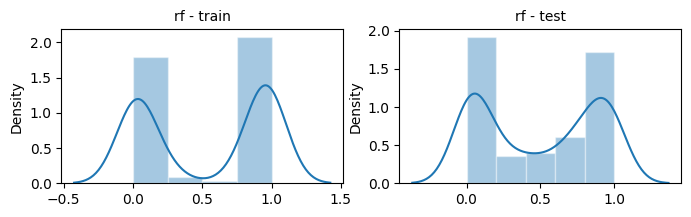

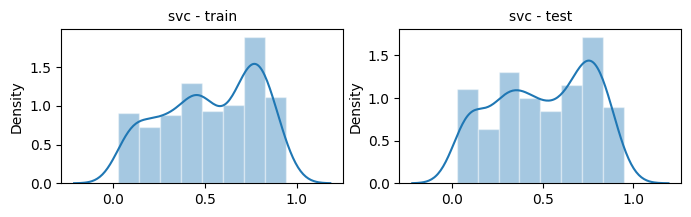

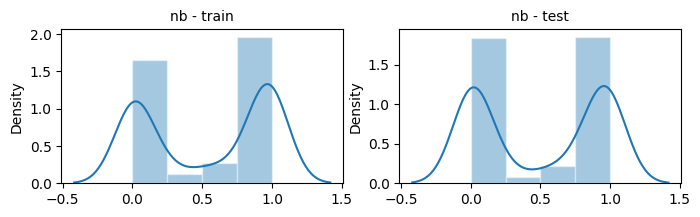

In [49]:
model_to_probs = {}
model_str_to_trained_model = {}

for model_str, model in model_to_clf.items():
    print(model)
    if model == SVC:
        clf = model(probability=True)
    elif model == LogisticRegression:
        clf = model(solver='liblinear')
    else:
        clf = model()
        
    clf.fit(train_X, train_y)
    
    pred_probs_train = clf.predict_proba(train_X)[:,1]
    pred_probs_test = clf.predict_proba(test_X)[:,1]
    pred_probs_valid = clf.predict_proba(valid_X)[:,1]
    
    model_to_probs[model_str] = {'train': pred_probs_train, 'test': pred_probs_test, 'valid': pred_probs_valid}
    
    plt.figure(figsize=(8, 2))
    
    plt.subplot(1, 2, 1)
    sns.histplot(pred_probs_train,
                 bins='fd',
                 stat='density',
                 kde=True,
                 kde_kws=dict(cut=3),
                 alpha=.4,
                 edgecolor=(1, 1, 1, .4))
    plt.title(f"{model_str} - train", fontsize=10)
    
    plt.subplot(1, 2, 2)
    sns.histplot(pred_probs_test,
                 bins='fd',
                 stat='density',
                 kde=True,
                 kde_kws=dict(cut=3),
                 alpha=.4,
                 edgecolor=(1, 1, 1, .4))
    plt.title(f"{model_str} - test", fontsize=10)
    
    model_str_to_trained_model[model_str] = clf
plt.show()